#Tên Thành Viên Nhóm:
##Lê Ngọc Tồn - 18086441
##Trần Chí Hùng - 18093941
##Nguyễn Mạnh Hà - 18084821

###**BÀI 3**



## Import thư viện cần thiết



In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd 

##Đọc dữ liệu 2 tập train

In [ ]:
class1_train = scipy.io.loadmat('/content/drive/MyDrive/Nhận dạng mẫu/Bài TH 3/class1_train.mat')['class1_train']
class2_train = scipy.io.loadmat('/content/drive/MyDrive/Nhận dạng mẫu/Bài TH 3/class2_train.mat')['class2_train']

class1_train.shape,class2_train.shape

((100, 2), (100, 2))

##Visualize dữ liệu của 2 tập train

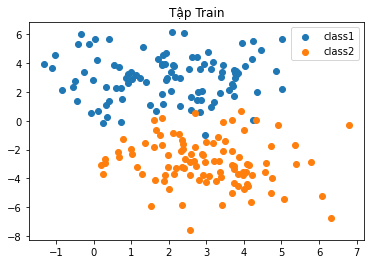

In [ ]:
plt.scatter(class1_train[:,0],class1_train[:,1],label="class1")
plt.scatter(class2_train[:,0],class2_train[:,1],label="class2")
plt.legend()
plt.title("Tập Train")
plt.show()

##Tạo cho mỗi lớp train có một nhãn lớp tương ứng [1,2]

In [ ]:
label1_train = np.ones((len(class1_train),1))
label2_train = 2*np.ones((len(class2_train),1))

label1_train.shape,label2_train.shape

((100, 1), (100, 1))

##Kết hợp dữ liệu nhãn và dữ liệu train tương ứng với từng lớp

In [ ]:
class1_train = np.hstack((class1_train,label1_train))
class2_train = np.hstack((class2_train,label2_train))

class1_train.shape,class2_train.shape

((100, 3), (100, 3))

##Kết hai dữ liệu train để tạo DataFrame

In [ ]:
dt_train = np.concatenate((class1_train,class2_train))

In [ ]:
dt_train = pd.DataFrame(data=dt_train,columns=['X1','X2','Label'])
dt_train

,X1,X2,Label
0,0.743738,2.258677,1.0
1,5.027590,5.702984,1.0
2,1.021112,2.899441,1.0
3,2.140428,3.794555,1.0
4,4.029366,3.811860,1.0
...,...,...,...
195,2.384398,-1.593380,2.0
196,0.989317,-1.972655,2.0
197,3.431020,-5.855819,2.0
198,3.501962,-1.379813,2.0


##Tính mean của mỗi thuộc tính tương ứng với từng class bằng cách groupby của mỗi label

In [ ]:
mean_lists = np.split(dt_train.groupby('Label').mean().values, [1,2])

In [ ]:
mean_lists = mean_lists[:-1]
print('mean_lists class_1:',mean_lists[0])
print('mean_lists class_2:',mean_lists[1])

mean_lists class_1: [[1.97909027 2.97947776]]
mean_lists class_2: [[ 3.01056198 -2.87167377]]


##Tính phương sai

In [ ]:
std_list = np.split(dt_train.groupby('Label').std().values, [1,2])

In [ ]:
std_list = std_list[:-1]
print('std_list:', std_list)

std_list: [array([[1.57487511, 1.56431732]]), array([[1.37657588, 1.62740029]])]


#Vì phương sai của 2 lớp khác nhau nên rơi vào trường hợp 3 của thuyết quyết định bayes

Tính P(w) của 2 lớp

In [ ]:
pi_list = dt_train.iloc[:,2].value_counts().values / len(dt_train)
print('pi_list:',pi_list)

pi_list: [0.5 0.5]


##Tìm hiệp phương sai của mỗi lớp

In [ ]:
cov1 = dt_train[dt_train['Label'] == 1.].cov().values[:-1,:-1]
cov2 = dt_train[dt_train['Label'] == 2.].cov().values[:-1,:-1]
print('Cov_1:',cov1)
print('Cov_2:',cov2)

Cov_1: [[2.4802316  0.08304637]
 [0.08304637 2.44708868]]
Cov_2: [[ 1.89496114 -0.31990908]
 [-0.31990908  2.64843169]]


##Tìm wi

In [ ]:
W1 = (-1/2) * np.linalg.inv(cov1)
W2 = (-1/2) * np.linalg.inv(cov2)

##Tìm Wi

In [ ]:
w1 = np.dot(np.linalg.inv(cov1),mean_lists[0].T).T
w2 = np.dot(np.linalg.inv(cov2),mean_lists[1].T).T

##Tìm w10 và w20

In [ ]:
w_1 = (-1/2)*np.dot(np.dot(mean_lists[0],cov1),mean_lists[0].T) - (1/2)*np.linalg.slogdet(cov1)[1] + np.log(pi_list[0])
w_2 = (-1/2)*np.dot(np.dot(mean_lists[1],cov2),mean_lists[1].T) - (1/2)*np.linalg.slogdet(cov2)[1] + np.log(pi_list[1])
w_1,w_2

(array([[-17.80293864]]), array([[-23.76278924]]))

##Xây dựng hàm biệt thức 

In [ ]:
def discriminent_func(X_test):
    for i in range(0, len(X_test)):
        x = X_test 
        x = x.reshape(-1,1) 
        g1 = np.dot(np.dot(x.reshape(1,-1), W1), x) + np.dot(w1, x) + w_1

        g2 = np.dot(np.dot(x.reshape(1,-1), W2), x) + np.dot(w2, x) + w_2
        
    if g1 > g2:#(Nếu biệt hàm của g1 > g2 thì thuộc tính x thuộc lớp 1 và ngược lại)
        return 1
    else:
        return 2


#Đọc dữ liệu Test

In [ ]:
class1_test = scipy.io.loadmat('/content/drive/MyDrive/Nhận dạng mẫu/Bài TH 3/class1_test.mat')['class1_test']
class2_test = scipy.io.loadmat('/content/drive/MyDrive/Nhận dạng mẫu/Bài TH 3/class2_test.mat')['class2_test']
class1_test.shape,class2_test.shape

((100, 2), (100, 2))

##Visualize tâp test

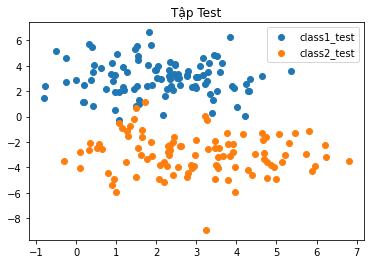

In [ ]:
plt.scatter(class1_test[:,0],class1_test[:,1],label="class1_test")
plt.scatter(class2_test[:,0],class2_test[:,1],label="class2_test")
plt.legend()
plt.title("Tập Test")
plt.show()

##Tạo label cho mỗi tập test

In [ ]:
label1_test = np.ones((len(class1_test),1))
label2_test = 2*np.ones((len(class2_test),1))

label1_test.shape,label2_test.shape

((100, 1), (100, 1))

##Kết hợp tập test với label tương ứng

In [ ]:
class1_test = np.hstack((class1_test,label1_test))
class2_test = np.hstack((class2_test,label2_test))

class1_test.shape,class2_test.shape

((100, 3), (100, 3))

##Tạo dataFrame và tên cột X1,X2 tương ứng với những thuộc tính, label tương ứng với lớp

In [ ]:
dt_test = np.concatenate((class1_test,class2_test))
dt_test = pd.DataFrame(data=dt_test,columns=['X1','X2','Label'])
dt_test

,X1,X2,Label
0,-0.240890,4.596388,1.0
1,2.439609,3.351035,1.0
2,0.628767,3.787607,1.0
3,1.166817,3.909538,1.0
4,2.468718,4.045309,1.0
...,...,...,...
195,2.591293,-2.340051,2.0
196,1.652125,-1.033863,2.0
197,3.921512,-2.825152,2.0
198,-0.301903,-3.517165,2.0


##Sử dụng biệt hàm để dự đoán tập test

In [ ]:
predict=[]
for i in range(len(dt_test)):
    predict.append(discriminent_func(dt_test.iloc[:,:-1].values[i]))
print(predict[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


##Xây dựng confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(pd.DataFrame(confusion_matrix(predict, dt_test.iloc[:,2], labels=[1,2]),index=['Class 1', 'Class 2'], columns=['Class 1', 'Class 2']))

         Class 1  Class 2
Class 1      100       27
Class 2        0       73


##Tính điểm accuracy tập test

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(dt_test.iloc[:,2], predict))

0.865


##Plot dữ liệu testing của 2 lớp và đường biên phân lớp trên cùng một hình.

In [ ]:
N=100
X = np.linspace(-5, 10, N) #Trả về 100 phần từ từ -5 đến 10
Y = np.linspace(-10, 8, N) #Trả về 100 phần từ từ -10 đến 8
X, Y = np.meshgrid(X, Y) 

In [ ]:
X = zip(np.ravel(X))
X

In [ ]:
zz = np.array( [discriminent_func(np.array([xx,yy])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
Z = zz.reshape(X.shape)
Z

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

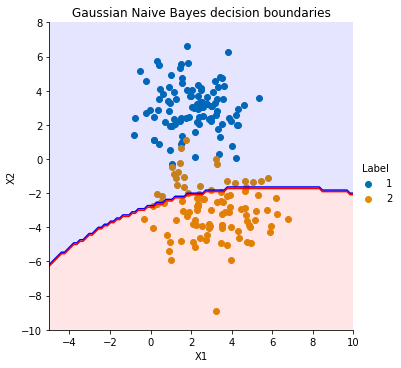

In [ ]:
color_list = ['Blues','Yellows']
g = sns.FacetGrid(dt_test, hue="Label", height=5, palette ='colorblind',hue_order=[1,2]) .map(plt.scatter, "X1","X2",) .add_legend() 
my_ax = g.ax
my_ax.contourf( X, Y, Z, 1,alpha=.1,colors = ('blue','red'))
my_ax.contour( X, Y, Z, 1,alpha=1,colors = ('blue','red'))
my_ax.set_xlabel('X1')
my_ax.set_ylabel('X2')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')
plt.show()